### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu từ file csv

In [8]:
df = pd.read_csv("./SampleSuperstore.csv",encoding = "ISO-8859-1")

## Tiền xử lý

**In 5 dòng đầu tiên của dữ liệu**

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Thông tin số dòng và số cột**

In [10]:
df.shape

(9994, 21)

**Mô tả dữ liệu**

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Thông tin cột**

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Kiểu dữ liệu của từng cột**

In [13]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Số giá trị null của từng cột**

In [14]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Loại bỏ các dòng có xuất hiện it nhất 1 giá trị null trong dataframe**

Do dữ liệu có hơn 20000 dòng nên việc loại bỏ các giá trị null rơi vào khoảng 2000 dòng không ảnh hưởng nhiều

In [15]:
df.dropna(inplace=True)

Kiểm tra lại dataframe

In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [17]:
df.shape

(9994, 21)

**Loại bỏ cột không cần thiết**

Các cột bị loại bỏ:
- Cột `discount_price__currency` và `price_detail__currency` đều chỉ có 1 giá trị duy nhất là `INR`
- Cột `is_wishlisted` có 1 giá trị duy nhất là `False`
- Cột `discount_price__price_string` có dữ liệu kiểu string và được tổng hợp từ 2 cột `discount_price__currency` và `discount_price__amount` nên ta sẽ loại bỏ cột này. Tương tự với cột `price_detail__price_string`
- Cột `id`, `url` không có thông tin hữu ích cho việc trực quan hóa và mô hình hóa
- Cột `avg_rating_recent` có giá trị dữ liệu từng dòng bằng với cột `rating` nên ta chọn loại bỏ cột `avg_rating_recent` để tránh dư thừa cột 

loai bo cot country vi chi co 1 gia tri duy nhat la United Stated

In [ ]:
a = df.groupby(['Country'])['Country'].count()
a

In [ ]:
print(df["discount_price__currency"].unique())
print(df["price_detail__currency"].unique())
print(df['is_wishlisted'].unique())

In [ ]:
print(df['avg_rating_recent'].equals(df['rating']))

In [ ]:
unused_columns = [
    'discount_price__currency', 
    'price_detail__currency',
    'discount_price__price_string',
    'price_detail__price_string',
    'is_wishlisted',
    'url',
    'id',
    'avg_rating_recent']

df.drop(columns=unused_columns, inplace=True)
df.columns

**Chuyển về kiểu dữ liệu datetime**

Áp dung cho 2 cột `created` và `published_time`

In [ ]:
df["created"] = pd.to_datetime(df["created"])
df["published_time"] = pd.to_datetime(df["published_time"])

Kiểu tra kiểu dữ liệu

In [ ]:
df.dtypes

Cách trích xuất thông tin từ dữ liệu datetime

In [ ]:
df['published_time'].dt.hour

**Chuyển giá trị tiền tệ từ INR thành USD**

USD là đơn vị tiền tệ phổ biến nên chuyển từ INR sang USD để có thể hiểu rõ hơn. Tại thời điểm thực hiện, 1 INR bằng khoảng 0.012 USD

In [ ]:
df['discount_price__amount'] = df['discount_price__amount'].apply(lambda x: x * 0.012)
df['price_detail__amount'] = df['price_detail__amount'].apply(lambda x: x * 0.012)

In [ ]:
df.head()

**Phân tích khách hàng**

Top những khách hàng có được từ Sales

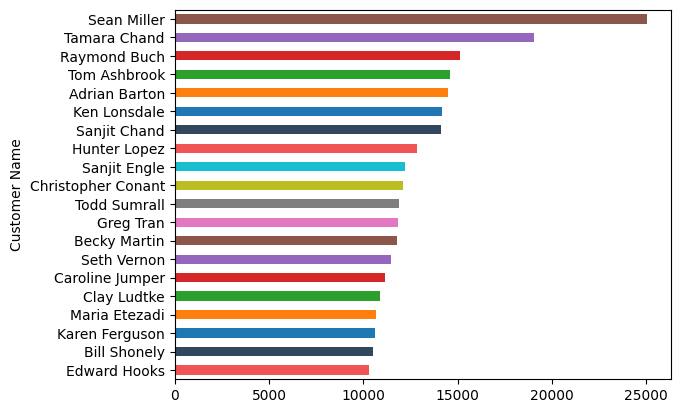

In [18]:
colors = color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

Mối quan hệ giữa Khách hàng và dịch vụ dịch chuyển

In [19]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [20]:
pivot_table = df.pivot_table(index = "Segment" ,columns="Ship Mode" ,values='Sales' , aggfunc = 'sum')
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


Text(0, 0.5, 'Sales')

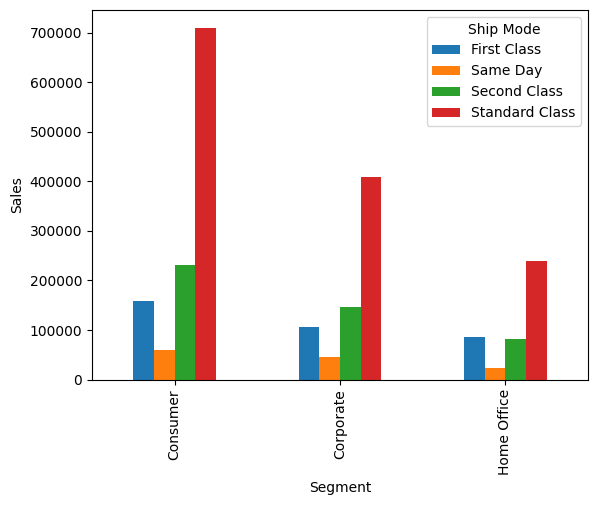

In [21]:
pivot_table.plot(kind = 'bar'  ,stacked = False)
plt.ylabel("Sales")